<a href="https://colab.research.google.com/github/AndrewNewton13/Learning/blob/main/Multiclass_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Multi-class image classification

In [ ]:
# Step 1 - Become one with the data
# Step 2 - preprocess the data
# Step 3 - Create a model
# Step 4 - Fit the model
# Step 5 - Evaluate the model
# Step 6 - Adjust hyperparameters and reduce overfitting
# Step 7 - Repeat until satisfied

In [ ]:
# Time to import and become one with the data
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip","r")
zip_ref.extractall()
zip_ref.close()

--2021-07-18 07:48:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 142.251.2.128, 74.125.137.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   258MB/s    in 1.9s    

2021-07-18 07:49:01 (258 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os 

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 images in '10_food_classes_all_data'
There are 10 directories and 0 images in '10_food_classes_all_data/test'
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'
There are 10 directori

In [ ]:
# setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [ ]:
def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


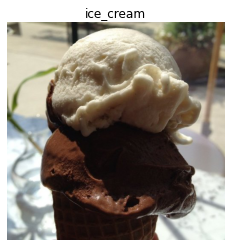

In [ ]:
# Visualize, visualize, visualize
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [ ]:
# Preprocess the data
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Import data from directory and turn into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='categorical',
                                             seed=42)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# Create a model
model_1 = tf.keras.Sequential()
model_1.add(Conv2D(filters=10,
                   kernel_size=3,
                   input_shape=(224,224,3)))
model_1.add(MaxPool2D(pool_size=2))
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D())
model_1.add(Conv2D(10,3,activation='relu'))
model_1.add(MaxPool2D())
model_1.add(Flatten())
model_1.add(Dense(10,activation='softmax'))

# Compile model_1
loss = tf.keras.losses.CategoricalCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_1.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_1
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
 87/235 [==========>...................] - ETA: 20s - loss: 2.2077 - accuracy: 0.1670

KeyboardInterrupt: ignored

In [ ]:
# Evaluate on the test data
model_1.evaluate(test_data)

In [ ]:
# Check out the model's loss curves 
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]
  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs we ran for

  # Plot loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# What do the loss curves tell us? The model is overfitting

In [ ]:
# Let's simplify the model
# Create model_2
model_2 = tf.keras.Sequential()
model_2.add(Conv2D(10,3,input_shape=(224,224,3)))
model_2.add(MaxPool2D(pool_size=2))
model_2.add(Conv2D(10,3,activation='relu'))
model_2.add(MaxPool2D())
model_2.add(Flatten())
model_2.add(Dense(10,activation='softmax'))

# Compile model_2
loss = tf.keras.losses.CategoricalCrossentropy()
opti = tf.keras.optimizers.Adam()
metrics = 'accuracy'
model_2.compile(loss=loss,optimizer=opti,metrics=metrics)

# Fit model_2
history_2 = model_2.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 44s 185ms/step - loss: 2.2371 - accuracy: 0.1937 - val_loss: 2.0830 - val_accuracy: 0.2444
Epoch 2/5
235/235 [==============================] - 42s 180ms/step - loss: 1.7956 - accuracy: 0.3823 - val_loss: 2.0035 - val_accuracy: 0.3016
Epoch 3/5
235/235 [==============================] - 44s 189ms/step - loss: 1.3887 - accuracy: 0.5484 - val_loss: 2.0872 - val_accuracy: 0.3008
Epoch 4/5
235/235 [==============================] - 42s 181ms/step - loss: 0.9399 - accuracy: 0.7105 - val_loss: 2.4166 - val_accuracy: 0.2616
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.5505 - accuracy: 0.8487 - val_loss: 2.8967 - val_accuracy: 0.2568


In [ ]:
# The validation accuracy is still poor
# Time to try data augmentation

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                  target_size=(224,224),
                                                  batch_size=32,
                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
model_2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 54, 54, 10)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 29160)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                291610    
Total params: 292,800
Trainable params: 292,800
Non-trainable params: 0
_______________________________________________

In [ ]:
# Clone the previous model
model_3 = tf.keras.models.clone_model(model_2)

# Compile model_3
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy') 
# Fit model_3
history_3 = model_3.fit(train_datagen_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_datagen_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 209s 449ms/step - loss: 2.2487 - accuracy: 0.1660 - val_loss: 2.0817 - val_accuracy: 0.2612
Epoch 2/5
235/235 [==============================] - 107s 457ms/step - loss: 2.1062 - accuracy: 0.2500 - val_loss: 1.9597 - val_accuracy: 0.3220
Epoch 3/5
235/235 [==============================] - 106s 452ms/step - loss: 1.9961 - accuracy: 0.3083 - val_loss: 2.0617 - val_accuracy: 0.3216
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 1.9500 - accuracy: 0.3371 - val_loss: 1.9044 - val_accuracy: 0.3664
Epoch 5/5
235/235 [==============================] - 105s 448ms/step - loss: 1.9222 - accuracy: 0.3425 - val_loss: 1.8721 - val_accuracy: 0.3580


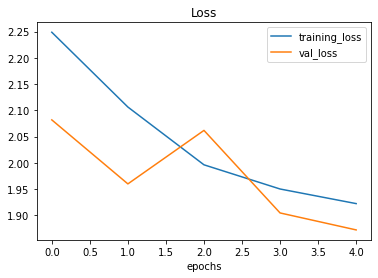

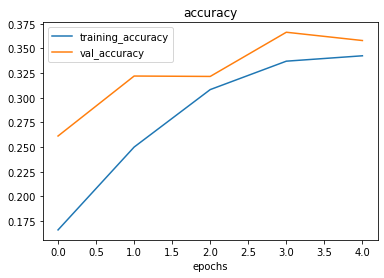

In [ ]:
# Plot the training curves
plot_loss_curves(history_3)

In [ ]:
# Make a prediction
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
!wget https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-steak.jpeg

--2021-07-18 08:21:35--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-sushi.jpeg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg           [ <=>                ] 114.55K   625KB/s    in 0.2s    

2021-07-18 08:21:35 (625 KB/s) - ‘03-sushi.jpeg’ saved [117304]

--2021-07-18 08:21:35--  https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/images/03-pizza-dad.jpeg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg       [ <=>                ] 119.35K  --.-KB/s    in 0.1s    

2021-07-18 08:21:36 (1.03 MB/s) - ‘03-pizza-dad.jpeg’ saved [122211]

--2021-07-18 08:2

In [ ]:
# Save a model
model_3.save("Saved_trained_model_3")

INFO:tensorflow:Assets written to: Saved_trained_model_3/assets


In [ ]:
# Load in a trained model and evaluate it 
loaded_model_10 = tf.keras.models.load_model("Saved_trained_model_3")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 10s 127ms/step - loss: 1.8721 - accuracy: 0.3580


[1.8720519542694092, 0.3580000102519989]

In [ ]:
model_3.evaluate(test_data)

29/79 [==========>...................] - ETA: 6s - loss: 1.8267 - accuracy: 0.3599

KeyboardInterrupt: ignored